## Data Science and Buisness analytics
## Task 2
## Clustering_kmeans
## N. Prithivi Rajan

## Importing libraries

In [1]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

## Importing the dataset 

In [2]:
data = pd.read_csv('https://github.com/Prithivi07/ml/raw/main/Iris.csv')

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
eyes = ['Iris-virginica','Iris-setos','Iris-versicolour']

### Taking the required features

In [4]:
data1 = data.drop(columns = 'Species')
data1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


## Training the model with dataset and Predicting values for 2 clusters

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data1)
pred = kmeans.predict(data1)

In [6]:
kmeans.inertia_

70616.29893333331

## Calculating inertia_ for 1 to 10 clusters to get optimum number of clusters

In [7]:
SSE = []
for clusters in range(1,10):
    kmeans = KMeans(n_clusters = clusters,random_state = 0)
    kmeans.fit(data1)
    SSE.append(kmeans.inertia_)

## Plotting the inertia_ for 1 to 10 clusters

Text(0, 0.5, 'Inertia')

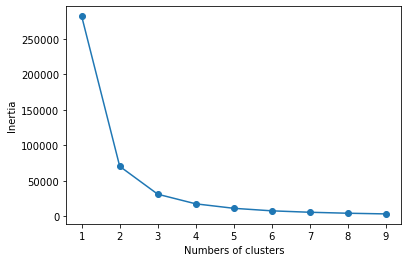

In [8]:
frame = pd.DataFrame({'Cluster':range(1,10),'SSE':SSE})

plt.figure()
plt.plot(frame['Cluster'],frame['SSE'],marker = 'o')
plt.xlabel('Numbers of clusters')
plt.ylabel('Inertia')

## From the above graph, we can get that optimum value for clusters is '3' for the given dataset

In [9]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(data1)
pred = kmeans.predict(data1)

In [10]:
data1['cluster']=pred

## Creating a function to plot the clusters between two features

In [11]:
def seg(str_x,str_y,clusters):
    x = []
    y = []
    for i in range(clusters):
        x.append(data1[str_x][data1['cluster']==i])
        y.append(data1[str_y][data1['cluster']==i])
    return x,y

def plot_clusters(str_x,str_y,clusters):
    plt.figure()
    
    x,y = seg(str_x,str_y,clusters)
    
    for i in range(clusters):
        plt.scatter(x[i],y[i],label = eyes[i])
    
    plt.xlabel(str_x)
    plt.ylabel(str_y)
    plt.title(str(str_x+" Vs "+str_y))
    plt.legend()

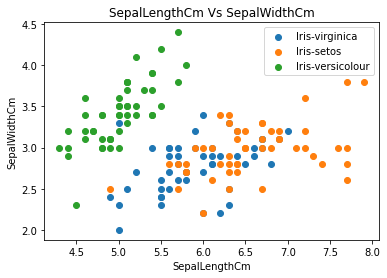

In [12]:
plot_clusters('SepalLengthCm','SepalWidthCm',3)

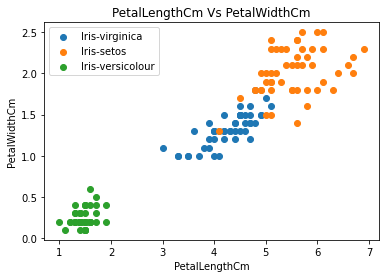

In [13]:
plot_clusters('PetalLengthCm','PetalWidthCm',3)